<a href="https://colab.research.google.com/github/scomarae/SkillBox/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%224_8_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.model_selection import train_test_split


X = housing.data
y = housing.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline

ValueError: x and y must have same first dimension, but have shapes (799,) and (800,)

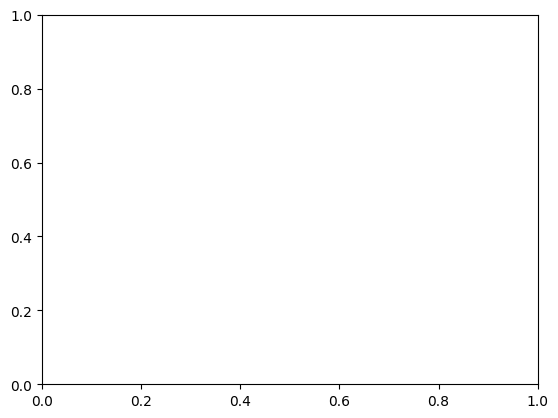

In [18]:
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.009, fit_intercept=True, random_state=42) #класс линейнеой регрессии с шагом 0.009
w_current = np.random.random(1) #сюда будем записывать текущие значения весов
epsilon = 0.0001 #ошибка к которой мы стремимся

weight_evolution, mse_evolution = [], [] #списки изменений весов и ошибок

for step in list(range(800)): #кол-во итераций
    # print(w_current)
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train) # итерация градиентного спуска
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_)) # записываем изменение весов (евклидова дистанция между точками)
    if weight_evolution[-1]<epsilon: #если последний элемент в списке изменений весов меньше ошибки к которой мы стремимся
        print("Итерации остановлены на шаге %d" % step); break #останаваливаем итерации, выводим номер шага на котором это произошло
    mse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid))) #иначе добавляем MSE в список
    w_current = sgd_regressor.coef_.copy() #и перезаписываем текущее значение весов
plt.plot(range(step), mse_evolution) #строим график ошибок